## Simple Kalman Estimator (No Control) Solution|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

D matrix is zero as there is no input feedthrough to output. Disturbance torque is included in this model.

Output directly measures only the angular position $\theta$ but not the angular rate $\dot{\theta}$.

Dynamics system is a damped body moving through space: $ thetadotdot  = - (g/l)*theta + u/ml^2 + taud/ml^2$ 

In [20]:
m = 0.1
l = 1
g = 9.81 #m / s^2
sensor_noise_std = .1

def dynamics(q, u=0):
    thetay = q[0]
    thetadoty = q[1]

    # calculate thetadotdoty
    thetadotdoty = (-g/l)*np.sin(thetay) + u/(m*l**2)
    
    return np.array((thetadoty, thetadotdoty))

def sensor_model(q):
    thetay = q[0] + (np.random.randn() * sensor_noise_std)
    
    return np.array((thetay))

A = np.array([[0, 1], [-g/l, 0]])
B = np.array([[0], [1/(m*l**2)]])
G = np.array([[0], [1/(m*l**2)]])
C = np.array([[1, 0]])

## Observability

In [12]:
obsv = ct.obsv(A, C) 
rank = np.linalg.matrix_rank(obsv) 
print(rank) # gives value equal to size of A => full rank => is observable

if rank == 2:
    print("The system is observable")

2
The system is observable


## 1. c) 
construct weight matrices and kalman gain matrix for low disturbance case

In [13]:
# disturbance size
QN = 1 # tuning knob
# sensor noise
RN = sensor_noise_std**2
L = ct.lqe(A, G, C, QN, RN)[0]
print(L)

[[13.46625623]
 [90.67002836]]


Simulate

<Figure size 640x480 with 0 Axes>

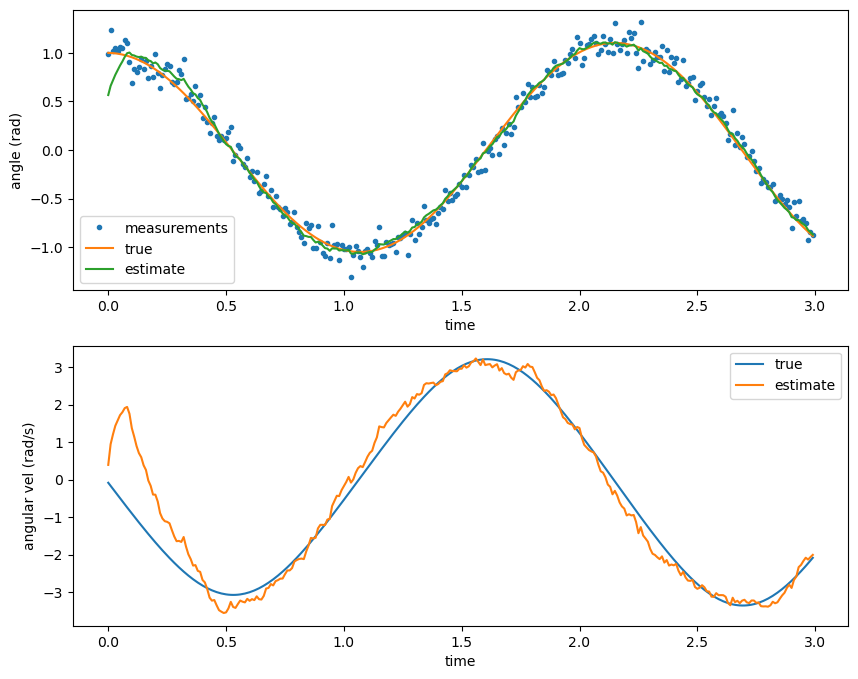

In [18]:
dt = 0.01
time = np.arange(0, 3, dt)
q = np.array([1, 0]) # initial condition
qhat = np.array([0.5, 0]) # initial estimate
q_data = np.zeros((len(time), len(q))) # log of state vector
y_data = np.zeros((len(time), 2)) # log of output vector 
qhat_data = np.zeros((len(time), len(q))) # log of state estimates

for idx, t in enumerate(time):
    y = sensor_model(q)
    q = q + dt * dynamics(q)
    qhatdot = (A @ qhat + L @ (y - C @ qhat))
    qhat = qhat + dt * qhatdot
    
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    y_data[idx,0] = y


# example for slide 
plt.figure()
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(time, y_data[:, 0], '.', time, q_data[:,0], time, qhat_data[:,0])
plt.xlabel('time'); plt.ylabel('angle (rad)')
plt.legend(('measurements', 'true', 'estimate'))
plt.subplot(2,1,2)
plt.plot(time, q_data[:,1], time, qhat_data[:,1])
plt.xlabel('time'); plt.ylabel('angular vel (rad/s)')
plt.legend(('true', 'estimate'));

## 1. d)

<Figure size 640x480 with 0 Axes>

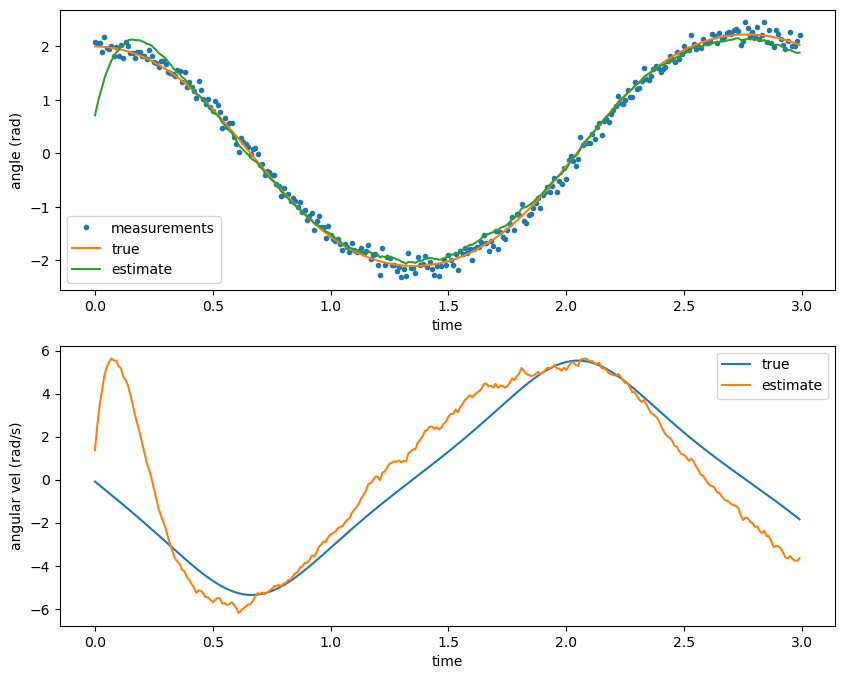

In [19]:
dt = 0.01
time = np.arange(0, 3, dt)
q = np.array([2, 0]) # initial condition
qhat = np.array([0.5, 0]) # initial estimate
q_data = np.zeros((len(time), len(q))) # log of state vector
y_data = np.zeros((len(time), 2)) # log of output vector 
qhat_data = np.zeros((len(time), len(q))) # log of state estimates

for idx, t in enumerate(time):
    y = sensor_model(q)
    q = q + dt * dynamics(q)
    qhatdot = (A @ qhat + L @ (y - C @ qhat))
    qhat = qhat + dt * qhatdot
    
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    y_data[idx,0] = y


# example for slide 
plt.figure()
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(time, y_data[:, 0], '.', time, q_data[:,0], time, qhat_data[:,0])
plt.xlabel('time'); plt.ylabel('angle (rad)')
plt.legend(('measurements', 'true', 'estimate'))
plt.subplot(2,1,2)
plt.plot(time, q_data[:,1], time, qhat_data[:,1])
plt.xlabel('time'); plt.ylabel('angular vel (rad/s)')
plt.legend(('true', 'estimate'));

## 1.e)

At $\theta=1$, the estimates and true values are in close alignment for the entire time of excursion or flight. For $\theta=2$, there is a clear deviation from linearization and the system moves far from it compared to when $\theta=1$. This makes the Kalman estimation inaccurate particularly the angular velocity.

Larger excursion result in larger error because of the deviation in linearization leading to inaccurate Kalman estimations. As a result, system error becomes higher compared to lower $\theta$ values.